<a href="https://colab.research.google.com/github/annguyenhuynh/Anhuynh/blob/main/Tensorflow_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Split dataset into independent and dependent features
X=data.iloc[:,3:13]
y=data.iloc[:,13]

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
geography=pd.get_dummies(X['Geography'],dtype=int, drop_first=True)
gender=pd.get_dummies(X['Gender'],dtype=int,drop_first=True)

In [8]:
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [9]:
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [10]:
X=X.drop(['Geography','Gender'],axis=1)

In [11]:
X=pd.concat([X,geography,gender],axis=1)

In [12]:
!pip install scikit-learn --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 46.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [13]:
!pip uninstall scikit-learn -y

Found existing installation: scikit-learn 1.5.1
Uninstalling scikit-learn-1.5.1:
  Successfully uninstalled scikit-learn-1.5.1


In [14]:
!pip install scikit-learn

  Using cached scikit_learn-1.5.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
Using cached scikit_learn-1.5.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.4 MB)


In [15]:
import sklearn
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

*   When we talk about **ANN**, one important thing is **Feature Scaling**
    *   Any ML models that are distance based (i.e. Linear Regression, Logistic Regression, KNN, KMeans, etc.) require feaature scaling
    *   When optimizers are involved (i.e Gradient Descent, SGD, etc.)





In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

❗

*  We use fit_transform() on the train data so that we learn the parameters of scaling on the train data and in the same time we scale the train data.
*   We only use transform() on the test data because we use the scaling paramaters learned on the train data to scale the test data.
*   In short, we want the same scale for training and testing dataset





In [18]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [19]:
X_train.shape

(8000, 11)

In [20]:
## Create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

# Dropout Layer
*   Work like regularization parameter (Lasso and Ridge Regression), reduce overfitting of the model



In [21]:
## Let initialize the ANN
classifier = Sequential()

In [24]:
## Adding the input layer
classifier.add(Dense(units=11, activation='relu'))

In [27]:
classifier.add(Dense(units=7, activation='relu'))

In [28]:
classifier.add(Dense(units=6, activation='relu'))

In [29]:
## Add output layers
classifier.add(Dense(1, activation='sigmoid'))

In [31]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
# With Adam optimizder, the learning rate is 0.01. One can specify the learning rate
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [43]:
## Early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [44]:
model = classifier.fit(X_train,y_train, validation_split=0.33,batch_size=10, epochs=1000,callbacks=[early_stopping])

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8798 - loss: 0.2869 - val_accuracy: 0.8395 - val_loss: 0.3984
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8713 - loss: 0.2989 - val_accuracy: 0.8417 - val_loss: 0.3989
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8714 - loss: 0.3024 - val_accuracy: 0.8444 - val_loss: 0.3960
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8800 - loss: 0.2912 - val_accuracy: 0.8391 - val_loss: 0.4001
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8708 - loss: 0.2979 - val_accuracy: 0.8391 - val_loss: 0.3960
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8713 - loss: 0.3012 - val_accuracy: 0.8353 - val_loss: 0.3991
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8844 - loss: 0.2792 - val_accuracy: 0.8368 - val_loss: 0.3988
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8706 - loss: 0.2930 - 

In [45]:
model.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

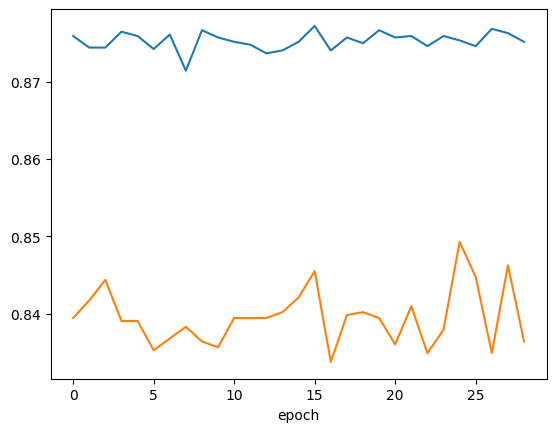

In [48]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.xlabel('epoch')
plt.show()

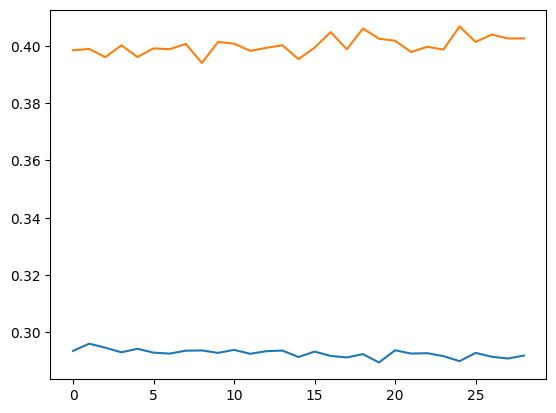

In [47]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])

In [49]:
## Do the prediction for test data
y_pred = classifier.predict(X_test)
y_pred = (y_pred>=0.5)



63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [52]:
# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1453,  142],
       [ 182,  223]])

In [54]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [55]:
score

0.838

In [56]:
# Get the weights
classifier.get_weights()

[array([[ 0.25279126,  1.0375816 , -0.22733217, -0.07168278,  0.15433568,
          0.28834873, -0.23494567,  0.25724977,  0.97815096,  0.44440338,
          0.12313197],
        [-1.2768568 , -0.05288643,  0.08233578,  0.20771235,  0.13654277,
         -0.8568837 , -1.0624036 ,  0.40505084, -0.5811528 , -0.22227947,
          0.87566817],
        [ 0.17908445,  0.33348012,  0.5645836 , -0.02589689,  0.19422476,
          0.07866675, -0.1786965 ,  0.14913179,  0.81277597,  0.48174563,
          0.08043201],
        [ 0.23778929, -0.47751617, -0.19267513,  0.26366454, -0.63820887,
         -0.00790098, -0.26247332,  0.5327568 ,  0.6472899 , -0.2999692 ,
         -0.17637612],
        [ 0.5144412 ,  0.00868121,  0.38254306,  1.2500741 , -1.3258463 ,
          0.3192889 ,  0.22528747,  0.61163414,  0.80787325,  0.33596042,
          0.5291385 ],
        [-1.1529938 ,  0.6413723 ,  0.6091272 , -0.0916218 , -0.32245386,
          1.0556931 ,  0.07638513, -0.31045377,  0.29365104, -0.1661991